In [1]:
!pip install pycaret

     |████████████████████████████████| 263 kB 5.4 MB/s 
     |████████████████████████████████| 6.8 MB 9.5 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 37.4 MB/s 
     |████████████████████████████████| 248 kB 45.2 MB/s 
     |████████████████████████████████| 105 kB 53.9 MB/s 
     |████████████████████████████████| 1.7 MB 44.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 52.4 MB/s 
     |████████████████████████████████| 14.4 MB 59 kB/s 
     |████████████████████████████████| 167 kB 55.7 MB/s 
     |████████████████████████████████| 80 kB 7.3 MB/s 
     |████████████████████████████████| 1.3 MB 41.6 MB/s 
     |████████████████████████████████| 636 kB 34.1 MB/s 
     |████████████████████████████████| 62 kB 518 kB/s 
     |██████████████████████

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
data = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (256326, 31)
Unseen Data For Predictions: (28481, 31)


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [6]:
from pycaret.classification import *

In [7]:
expt_basic = setup(
    data = data, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    ignore_features=["Time"],
    numeric_imputation="median",        # "mean" by default
    normalize=True,
    normalize_method="minmax",
    categorical_imputation="mode",      # "constant" (not_available) by default
    feature_selection = True
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
best = compare_models(sort="F1", exclude=["gpc", "mlp", "rbfsvm"], fold=5,n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9400,0.7646,0.9502,0.8466,0.8463,0.8517,15.574
rf,Random Forest Classifier,0.9995,0.9413,0.7732,0.9322,0.8443,0.8441,0.8483,108.300
knn,K Neighbors Classifier,0.9995,0.9120,0.7761,0.9069,0.8357,0.8355,0.8383,117.282
lda,Linear Discriminant Analysis,0.9993,0.8964,0.7447,0.8552,0.7939,0.7936,0.7966,1.002
dt,Decision Tree Classifier,0.9991,0.8609,0.7222,0.7386,0.7299,0.7294,0.7297,8.966
ada,Ada Boost Classifier,0.9991,0.9739,0.6710,0.7897,0.7241,0.7236,0.7268,34.610
gbc,Gradient Boosting Classifier,0.9990,0.7673,0.6173,0.7821,0.6838,0.6834,0.6912,181.978
lr,Logistic Regression,0.9990,0.9775,0.5037,0.8479,0.6291,0.6287,0.6515,1.922
svm,SVM - Linear Kernel,0.9989,0.0000,0.4559,0.8422,0.5904,0.5899,0.6185,0.390
ridge,Ridge Classifier,0.9989,0.0000,0.4247,0.8326,0.5612,0.5607,0.5934,0.210


In [14]:
models = []
for i in best:
  models.append(tune_model(i, fold=3, optimize="F1"))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.8304,0.6695,0.7900,0.7248,0.7243,0.7268
1,0.9992,0.8503,0.6923,0.8020,0.7431,0.7427,0.7447
2,0.9994,0.9109,0.8051,0.8333,0.8190,0.8187,0.8188
Mean,0.9992,0.8638,0.7223,0.8084,0.7623,0.7619,0.7634
SD,0.0001,0.0342,0.0593,0.0183,0.0408,0.0408,0.0398


In [16]:
models

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                      criterion='gini', max_depth=1, max_features=1.0,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.05, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                        criterion='entropy', max_depth=9, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0, min_impurity_split=None,
                        min_samples_leaf=6, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, n_estimators=230,
                        n_jobs=-1, o

In [17]:
blended_model = blend_models(estimator_list=models) #creates a blended model from all fine tuned models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9777,0.6000,0.8400,0.7000,0.6996,0.7095
1,0.9994,0.9785,0.7143,0.9259,0.8065,0.8062,0.8130
2,0.9994,0.9749,0.8000,0.8485,0.8235,0.8232,0.8236
3,0.9993,0.9315,0.7714,0.7941,0.7826,0.7822,0.7823
4,0.9994,0.9598,0.8000,0.8235,0.8116,0.8113,0.8114
5,0.9994,0.9578,0.7143,0.9259,0.8065,0.8062,0.8130
6,0.9997,0.9888,0.8857,0.9394,0.9118,0.9116,0.9120
7,0.9993,0.9937,0.7778,0.8000,0.7887,0.7884,0.7884
8,0.9994,0.9703,0.8056,0.8529,0.8286,0.8283,0.8286
9,0.9996,0.9715,0.8333,0.9375,0.8824,0.8822,0.8837


In [18]:
predict_model(blended_model) #prediction on split data 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9994,0.9872,0.7742,0.9,0.8324,0.8321,0.8345


In [19]:
#prediction on unseen data 
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1,0.9448
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0,0.9468
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0,0.9508
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0,0.9468
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0,0.9485


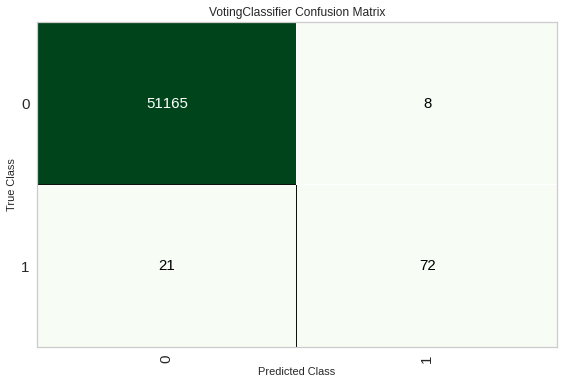

In [20]:
plot_model(blended_model, plot="confusion_matrix")

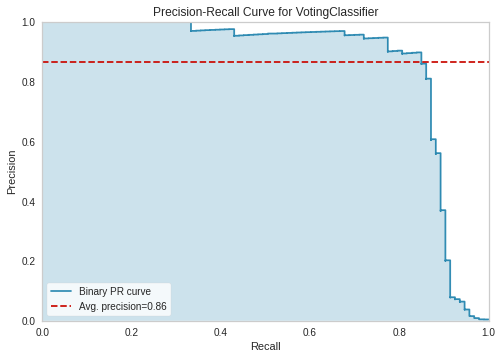

In [21]:
plot_model(blended_model, plot="pr")

In [22]:
save_model(blended_model, "blended_expt1")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Time'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=15,
         

In [28]:
acc = {
    'Model' : 'Voting Classifier' ,
    'Accuracy': 0.9994 , 
    'AUC' : 0.9872	,
    'Recall' : 0.7742 ,
    'Prec.' : 0.9 , 
    'F1' : 0.8324 ,
    'Kappa' : 0.8321 , 
    'MCC' : 0.8345

 }

 
import json
out_file = open("acc_expt1.json", "w") 
    
json.dump(acc, out_file, indent = 6) 
    
out_file.close() 